# Algoritmo de Softmax

Leia a explicação do algoritmo no [README.md!](README.md)

In [1]:
import sys
sys.path.append('../')
import bandit #importa o ambient
import numpy as np

## Definindo a função Softmax

In [2]:
def softmax(lista):
    """(lista de valores) -> lista com probabilidades
    Aplica a função softmax em uma lista de valores, os transformando em probabilidades respectivas.
    """
    exp_H = (np.exp(lista))
    sum_exp_H = np.sum(exp_H)
    prob_list = exp_H/sum_exp_H

    return(prob_list)

## Definindo o Agente

In [3]:
class AgenteSoftmax(object):
    def __init__(self, k_bracos, step_size=0.1):
        self.step_size = step_size
        self.k_bracos = k_bracos
        self.H_valores = np.zeros(k_bracos)
        self.ultima_acao = np.random.choice(k_bracos)

    def agente_step(self, recompensa, recompensa_media):
        """ (float) -> acao(int)
        Dá um step para o Agente atualizando os H_valores. 
        Pega a recompensa do estado e retorna a ação escolhida.
        """

        pi_valores = softmax(self.H_valores)

        for a in range(self.k_bracos):
            if a != self.ultima_acao:
                self.H_valores[self.ultima_acao] += self.step_size*(recompensa - recompensa_media)*(1 - pi_valores[self.ultima_acao])
            else:
                self.H_valores[a] -= self.step_size*(recompensa - recompensa_media) * pi_valores[a]
        
        acao_atual = np.random.choice(self.k_bracos, 1, p=pi_valores)

        return acao_atual

## Testando o Agente

In [4]:
import matplotlib.pyplot as plt

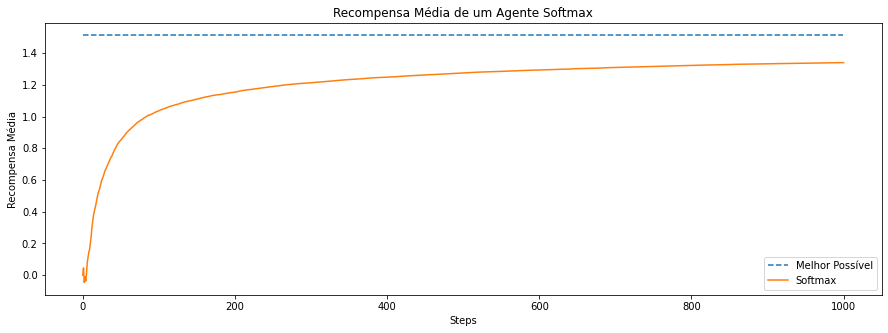

In [5]:
num_runs = 200
num_steps = 1000
np.random.seed(1)
total_medias = []

media_maxima = 0
for runs in range(num_runs):

    agente = AgenteSoftmax(k_bracos=10, step_size=0.1)

    env = bandit.GaussianBandit(k_bracos=10)

    pontuacao = [0]
    medias = [0]

    media_maxima += np.max(env.bandits_expectations)

    for steps in range(0, num_steps):
        recompensa = env.gamble(agente.ultima_acao)
        agente.ultima_acao = agente.agente_step(recompensa, medias[steps])

        pontuacao.append(pontuacao[-1] + recompensa)
        medias.append(pontuacao[-1]/(steps+1))
    total_medias.append(medias)

plt.figure(figsize=(15,5))
plt.plot([media_maxima / num_runs for _ in range(num_steps)], linestyle="--")
plt.plot(np.mean(total_medias, axis=0))
plt.legend(["Melhor Possível", "Softmax"])
plt.title("Recompensa Média de um Agente Softmax")
plt.xlabel("Steps")
plt.ylabel("Recompensa Média")
plt.show()